# San Diego temperature history

## Objective
Obtain and present historical temperatures for San Diego from 1969 to 2019

## Description 
Temperature data is obtained from two sources:
* "Climate Change: Earth Surface Temperature Data" dataset, at Kaggle.com.
* http://www.worldweatheronline.com

The "Climate Change: Earth Surface Temperature Data" dataset contains data for 3000 cities from 1743 to 2013.  Multiple files were download, but only one for is used.  The applicable dataset is in the file:
* GlobalLandTemperaturesByMajorCity.csv (532 MB, 240,000 rows, 101 cities). To save space on github, this file is pruned to include only the San Diego data (135 KB).

The World Weather Online site provides historical data for $36 dollars. The data is monthly temperature averages from 2009 to 2019. The San Diego download is in the file:
* san-diego-monthly-temperature.csv (14 KB, 133 rows)

The data from both files will be combined into one data frame as follows:
* GlobalLandTemperaturesByMajorCity.csv: San Diego from 1969 to 2008
* san-diego-monthly-temperature.csv: from 2009 to 2019


## Obtain historical temperature data

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

folder_name_1 = "resources/climate-change-earth-surface-temperature-data/"
san_diego_file_name_1 = "GlobalLandTemperaturesByCity.csv"
folder_name_2 = "resources/world-weather-online/"
san_diego_file_name_2 = "san-diego-monthly-temperature.csv"

In [2]:
# import the San Diego data from GlobalLandTemperaturesByMajorCity.csv
raw_data_san_diego_1 = pd.read_csv(folder_name_1 + san_diego_file_name_1)
san_diego_data_1 = raw_data_san_diego_1.loc[raw_data_san_diego_1['City'] == 'San Diego'] 

# replace the old "GlobalLandTemperaturesByCity.csv (which is 532 MB) with one that only contains San Diego data
san_diego_data_1.to_csv(folder_name_1 + san_diego_file_name_1, index=False)

# display
san_diego_data_1

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,13.116,2.586,San Diego,United States,32.95N,117.77W
1,1849-02-01,12.656,1.882,San Diego,United States,32.95N,117.77W
2,1849-03-01,13.551,2.035,San Diego,United States,32.95N,117.77W
3,1849-04-01,14.146,2.805,San Diego,United States,32.95N,117.77W
4,1849-05-01,13.543,1.882,San Diego,United States,32.95N,117.77W
...,...,...,...,...,...,...,...
1972,2013-05-01,17.635,0.445,San Diego,United States,32.95N,117.77W
1973,2013-06-01,18.632,0.338,San Diego,United States,32.95N,117.77W
1974,2013-07-01,19.929,0.367,San Diego,United States,32.95N,117.77W
1975,2013-08-01,20.076,0.522,San Diego,United States,32.95N,117.77W


In [3]:
# cull unnecessary columns
san_diego_data_1 = san_diego_data_1[['dt', 'AverageTemperature']]

# drop years before 1969 and after 2008
san_diego_data_1 = san_diego_data_1.loc[san_diego_data_1['dt'] >= '1969'] 
san_diego_data_1 = san_diego_data_1.loc[san_diego_data_1['dt'] < '2009'] 

# change the date format to only show the year
san_diego_data_1['dt'] = san_diego_data_1["dt"].str.split("-").str[0]

san_diego_data_1

,dt,AverageTemperature
1440,1969,14.225
1441,1969,11.930
1442,1969,12.579
1443,1969,14.543
1444,1969,15.772
...,...,...
1915,2008,21.066
1916,2008,21.199
1917,2008,20.638
1918,2008,18.488


In [4]:
# import the San Diego data from san-diego-monthly-temperature.csv
san_diego_data_2 = pd.read_csv(folder_name_2 + san_diego_file_name_2)

# display
san_diego_data_2

,loc_id,year,month,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,rainMM,...,avgwindgustKmph,visibilityKm,visibilityMiles,humidity,pressureMB,pressureInches,cloudcover,sun_hour,sun_days,uvindex
0,1,2009,1,18,64,12,54,15,58,4.35,...,17.0,10,6,57,1019.8,30.6,13,221.5,26,5
1,1,2009,2,16,60,11,51,13,55,19.53,...,17.8,10,6,67,1018.2,30.5,22,196.5,22,5
2,1,2009,3,17,63,10,50,13,56,0.31,...,14.4,10,6,68,1016.0,30.5,11,301.0,30,4
3,1,2009,4,18,64,11,52,14,57,1.21,...,15.5,10,6,68,1015.1,30.5,11,367.5,26,4
4,1,2009,5,20,68,12,54,16,60,0.19,...,11.7,10,6,73,1012.6,30.4,5,386.0,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1,2019,8,25,78,20,68,24,76,1.90,...,11.7,10,6,69,1012.1,30.4,8,304.0,29,7
128,1,2019,9,24,76,19,67,23,73,17.10,...,12.1,10,6,66,1011.8,30.4,22,267.5,21,6
129,1,2019,10,23,74,19,66,22,72,0.20,...,10.9,10,6,52,1013.0,30.4,4,310.0,30,6
130,1,2019,11,21,71,16,61,20,68,113.60,...,13.3,10,5,58,1014.0,30.4,24,253.5,21,3


In [5]:
# cull unnecessary columns and rename to match the columns in san_diego_data_1
san_diego_data_2 = san_diego_data_2[['year', 'avgtempC']]
san_diego_data_2.columns = ['dt', 'AverageTemperature']
san_diego_data_2

,dt,AverageTemperature
0,2009,15
1,2009,13
2,2009,13
3,2009,14
4,2009,16
...,...,...
127,2019,24
128,2019,23
129,2019,22
130,2019,20


In [6]:
# concatenate the two data frames into one
temp_df = pd.concat([san_diego_data_1, san_diego_data_2])

# ??? 
# the next line is necessary, for some reason, to insure that
# the below temp_array is in the correct yearly order, otherwise
# the years 1969-2008 are placed after the years 2009-2019
temp_df['dt'] = temp_df['dt'].astype(int)

# reset the index of the concatenated data frame
temp_df.reset_index(inplace=True)

In [7]:
# create groupby, which will be used for averaging the monthly temperatures for each year
temp_group = temp_df.groupby(['dt'])
temp_yearly_mean = temp_group['AverageTemperature'].mean()

# create a temperature array for the y-axis of the plot
temp_array = temp_yearly_mean.values

# create a year array for the x-axis of the plot
year_array = np.arange(1969, 2019 + 1)

# verify both axes are the same length
print(f"Length of x-axis is {len(year_array)}")
print(f"Length of y-axis is {len(temp_array)}")

Length of x-axis is 51
Length of y-axis is 51


In [8]:
# Set linear regression line
slope, intercept, _, _, _ = linregress(year_array, temp_array)
fit = slope * year_array + intercept

## Present the historical temperature data

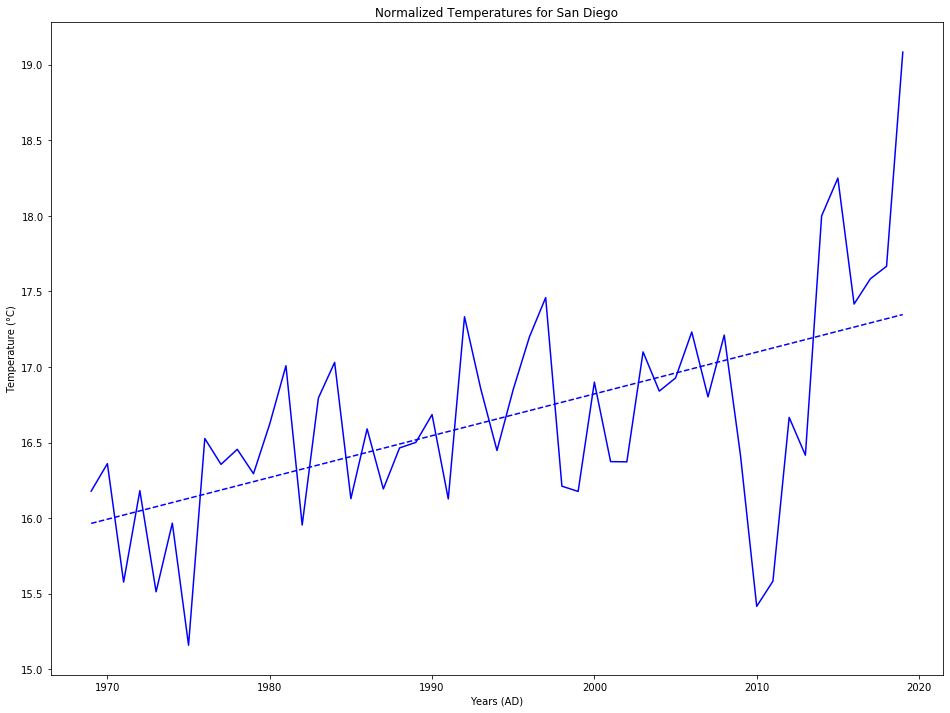

In [9]:
# plot the temperatures as a scatterplot
plt.figure(num=0,figsize=(16, 12))
plt.plot(year_array, temp_array, color="blue")

# plot the linear 
plt.plot(year_array, fit, 'b--')

plt.title("Normalized Temperatures for San Diego")
plt.xlabel("Years (AD)")
plt.ylabel("Temperature (°C)")

# Save the Figure
plt.savefig("images/Normalized Temperatures for San Diego.png")

In [10]:
# export data
df = pd.DataFrame({'Year': year_array, 'Mean Temp (C)': temp_array})
df.to_csv('output/Yearly temperature data.csv', index=False)

In [11]:
# plot CO2 levels vs. temp over 1969 to 2019
folder_name_3 = "resources/"
CO2_file = "cleansamples.csv"
CO2_raw = pd.read_csv(folder_name_3 + CO2_file)
CO2_df = CO2_raw[['Yr', 'CO2 filled [ppm]']]
CO2_df

,Yr,CO2 filled [ppm]
0,1969,331.44
1,1969,326.52
2,1969,329.61
3,1969,327.92
4,1969,330.29
...,...,...
607,2019,403.82
608,2019,407.09
609,2019,410.47
610,2019,413.15


In [12]:
# create groupby, which will be used for averaging the monthly CO2 for each year
CO2_group = CO2_df.groupby(['Yr'])
CO2_yearly_mean = CO2_group['CO2 filled [ppm]'].mean()

# create a temperature array for the y-axis of the plot
CO2_array = CO2_yearly_mean.values

In [13]:
# Set linear regression line for global temps and CO2
slope_t, intercept_t, r_value_t, p_value_t, std_err_t = \
    linregress(year_array, temp_array)
fit_t = slope_t * year_array + intercept_t

slope_c, intercept_c, r_value_c, p_value_c, std_err_c = \
    linregress(year_array, CO2_array)
fit_c = slope_c * year_array + intercept_c

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x10d447990> has a label of '_line1' which cannot be automatically added to the legend.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x10d447e10> has a label of '_line1' which cannot be automatically added to the legend.
  


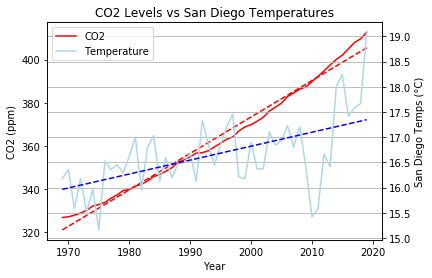

In [14]:
# Plot co2 levels vs temp

fig, ax1 = plt.subplots()
ax1.plot(year_array, CO2_array, color='red', label='CO2')

ax2 = ax1.twinx() 
ax2.plot(year_array, temp_array, color='lightblue', label='Temperature')

# plot the linear 
ax1.plot(year_array, fit_c, 'r--')
ax2.plot(year_array, fit_t, 'b--')

lines = ax1.get_lines() + ax2.get_lines()
plt.legend(lines, [line.get_label() for line in lines], loc='best')

plt.title('CO2 Levels vs San Diego Temperatures')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 (ppm)')
ax2.set_ylabel('San Diego Temps (°C)')
plt.grid()

plt.savefig('images/CO2Temp.png')

In [15]:
#correlation between CO2 and San Diego mean temperature
combined_df = pd.DataFrame({'CO2':CO2_array, 
                            'San Diego temperature':temp_array})
combined_df.corr()

,CO2,San Diego temperature
CO2,1.000000,0.585668
San Diego temperature,0.585668,1.000000


In [16]:
# plot MSL levels vs. temp over 1969 to 2019
folder_name_4 = "resources/"
msl_file = "cleanMSL.csv"
msl_raw = pd.read_csv(folder_name_4 + msl_file)
msl_df = msl_raw[['Year', 'MSL']]
msl_df


,Year,MSL
0,1969,-0.003
1,1969,-0.030
2,1969,-0.059
3,1969,-0.043
4,1969,-0.054
...,...,...
604,2019,0.031
605,2019,0.006
606,2019,-0.008
607,2019,0.036


In [17]:
# create groupby, which will be used for averaging the monthly CO2 for each year
msl_group = msl_df.groupby(['Year'])
msl_yearly_mean = msl_group['MSL'].mean()

# create a temperature array for the y-axis of the plot
msl_array = msl_yearly_mean.values

In [18]:
# Set linear regression line for MSL (temp is already done)
slope_msl, intercept_msl, r_value_msl, p_value_msl, std_err_msl = \
    linregress(year_array, msl_array)
fit_msl = slope_msl * year_array + intercept_msl

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1a20bb8610> has a label of '_line1' which cannot be automatically added to the legend.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1a20bb8a90> has a label of '_line1' which cannot be automatically added to the legend.
  


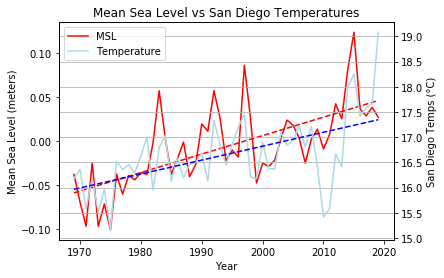

In [19]:
# Plot MSL levels vs temp

fig, ax1 = plt.subplots()
ax1.plot(year_array, msl_array, color='red', label='MSL')

ax2 = ax1.twinx() 
ax2.plot(year_array, temp_array, color='lightblue', label='Temperature')

# plot the linear 
ax1.plot(year_array, fit_msl, 'r--')
ax2.plot(year_array, fit_t, 'b--')

lines = ax1.get_lines() + ax2.get_lines()
plt.legend(lines, [line.get_label() for line in lines], loc='best')

plt.title('Mean Sea Level vs San Diego Temperatures')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Sea Level (meters)')
ax2.set_ylabel('San Diego Temps (°C)')
plt.grid()

plt.savefig('images/MSLTemp.png')

In [20]:
#correlation between MSL and San Diego mean temperature
combined_msl_df = pd.DataFrame({'MSL':msl_array, 
                            'San Diego temperature':temp_array})
combined_msl_df.corr()

,MSL,San Diego temperature
MSL,1.000000,0.680215
San Diego temperature,0.680215,1.000000
